<a href="https://colab.research.google.com/github/akinolanath5519/uber-fare-prediction-with-deployment/blob/main/Uber_Price_Prediction(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
data=files.upload()

Saving uber.csv to uber.csv


In [4]:
#loading the datasets
data=pd.read_csv("uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


# **Data Cleaning**

**Handle missing values**

In [6]:
#check for missing values
data.isnull().sum()


,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [7]:
# Drop rows with missing values in any column
data = data.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])

# Verify
data.isnull().sum()


,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


**Correct data types**

In [8]:
data.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


**Remove Outliers / Invalid Values**

In [10]:
data = data[(data['fare_amount'] > 0) &
        (data['passenger_count'] > 0) &
        (data['passenger_count'] <= 6) &
        (data['pickup_latitude'].between(40.5, 41)) &
        (data['pickup_longitude'].between(-74.5, -73)) &
        (data['dropoff_latitude'].between(40.5, 41)) &
        (data['dropoff_longitude'].between(-74.5, -73))]



Why: Outliers can distort analysis and predictive models

**Feature Engineering**

In [12]:
# Convert pickup_datetime to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')

# Drop any rows where conversion failed (optional, if any)
data = data.dropna(subset=['pickup_datetime'])

# Now you can extract hour and day
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.dayofweek  # Monday=0


Why: Helps find patterns like “fares are higher on weekends” or “rush hour vs late night rides.”

**Exploratory Data Analysis (EDA)**

In [14]:
data.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day
count,1.949620e+05,194962.000000,194962.000000,194962.000000,194962.000000,194962.000000,194962.000000,194962.000000,194962.000000
mean,2.771440e+07,11.338905,-73.975435,40.750782,-73.974472,40.751077,1.689873,13.490639,3.049307
std,1.600875e+07,9.722611,0.035085,0.027062,0.035169,0.030878,1.305767,6.515788,1.947012
min,1.000000e+00,0.010000,-74.403080,40.508697,-74.449079,40.510800,1.000000,0.000000,0.000000
25%,1.383291e+07,6.000000,-73.992276,40.736452,-73.991600,40.735329,1.000000,9.000000,1.000000
50%,2.776044e+07,8.500000,-73.982115,40.753288,-73.980547,40.753733,1.000000,14.000000,3.000000
75%,4.154600e+07,12.500000,-73.968389,40.767520,-73.965425,40.768310,2.000000,19.000000,5.000000
max,5.542357e+07,499.000000,-73.219710,40.991651,-73.101445,40.996788,6.000000,23.000000,6.000000


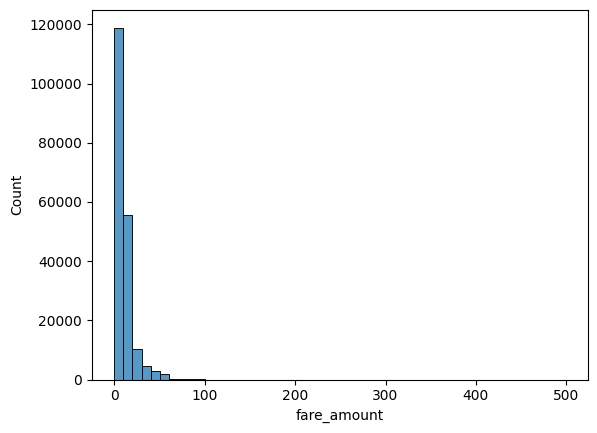

In [15]:
# Fare distribution
sns.histplot(data['fare_amount'], bins=50)
plt.show()


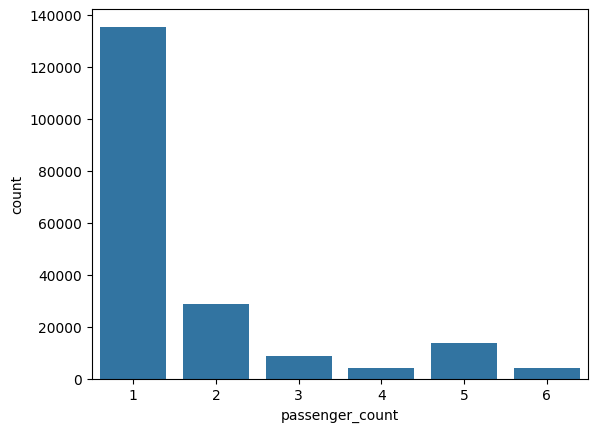

In [17]:
# Passenger count distribution
sns.countplot(x='passenger_count', data=data)
plt.show()


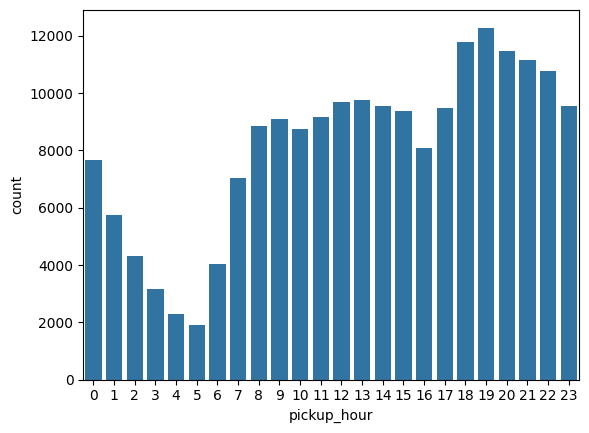

In [18]:
# Rides by hour
sns.countplot(x='pickup_hour', data=data)
plt.show()

**Prepare Features and Target**

In [21]:
from sklearn.model_selection import train_test_split

# Features we will use
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
          'dropoff_latitude', 'passenger_count', 'pickup_hour', 'pickup_day']]

# Target
y = data['fare_amount']

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


**Scale Features**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train a Model**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 73.33
R^2 Score: 0.25


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb:.2f}")
print(f"Gradient Boosting R^2: {r2_gb:.2f}")


Gradient Boosting MSE: 25.65
Gradient Boosting R^2: 0.74
